<a href="https://colab.research.google.com/github/vinay10949/AnalyticsAndML/blob/master/kaggle/Santander%20Customer%20Satisfaction/Santander_Customer_Satisfaction_DataReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective - To find out columns for bivariate and univariate analysis**

In [1]:
!pip install --user kaggle
!mkdir .kaggle
import json
token = {"username":"vinay10949","key":"59c4901452f76ce62979e5b0997e240b"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)    

In [233]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.22.2.post1)


In [3]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

!chmod 600 /root/.kaggle/kaggle.json
!kaggle competitions download -c santander-customer-satisfaction
!unzip train.csv.zip
!unzip test.csv.zip

  0% 0.00/4.05M [00:00<?, ?B/s]
100% 4.05M/4.05M [00:00<00:00, 67.1MB/s]
  0% 0.00/4.02M [00:00<?, ?B/s]
100% 4.02M/4.02M [00:00<00:00, 134MB/s]
  0% 0.00/612k [00:00<?, ?B/s]
100% 612k/612k [00:00<00:00, 198MB/s]
Archive:  train.csv.zip
  inflating: train.csv               


#Importing of Libraries

In [0]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.feature_selection import VarianceThreshold 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

from sklearn.ensemble import RandomForestClassifier

In [0]:
train_data=pd.read_csv("train.csv")
validation_data=pd.read_csv("test.csv") ## Not to be used to avoid data leakage

trainX, testX, trainY, testY = train_test_split(
    train_data.drop(labels=['ID'], axis=1),
    train_data['TARGET'],
    test_size=0.3,
    random_state=0)


In [167]:
print(train_data.shape,test_data.shape)
print(train_data.TARGET.value_counts())
#Data is imbalanced 
# 0    73012 #Satisfied
# 1     3008 #Dissatisfied

(76020, 371) (75818, 370)
0    73012
1     3008
Name: TARGET, dtype: int64


# **Dropping Columns with Constant and Quasi Constant (Dimensionality Reduction)**

In [168]:
print(trainX.dtypes.value_counts())

sel = VarianceThreshold(threshold=0)
sel.fit(trainX)
print("No of non selected columns",
    len([
        x for x in trainX.columns
        if x not in trainX.columns[sel. get_support()]
    ]))

print("Non Selected Columns" ,[x for x in trainX.columns if x not in trainX.columns[sel.get_support()]])

int64      259
float64    111
dtype: int64
No of non selected columns 38
Non Selected Columns ['ind_var2_0', 'ind_var2', 'ind_var27_0', 'ind_var28_0', 'ind_var28', 'ind_var27', 'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27', 'num_var41', 'num_var46_0', 'num_var46', 'saldo_var28', 'saldo_var27', 'saldo_var41', 'saldo_var46', 'delta_imp_reemb_var33_1y3', 'delta_num_reemb_var33_1y3', 'imp_amort_var18_hace3', 'imp_amort_var34_hace3', 'imp_reemb_var13_hace3', 'imp_reemb_var33_hace3', 'imp_reemb_var33_ult1', 'imp_trasp_var17_out_hace3', 'imp_trasp_var33_out_hace3', 'num_var2_0_ult1', 'num_var2_ult1', 'num_reemb_var13_hace3', 'num_reemb_var33_hace3', 'num_reemb_var33_ult1', 'num_trasp_var17_out_hace3', 'num_trasp_var33_out_hace3', 'saldo_var2_ult1', 'saldo_medio_var13_medio_hace3']


In [0]:
sel = VarianceThreshold(threshold=0)
sel_var=sel.fit_transform(trainX)
trainX=trainX[trainX.columns[sel.get_support(indices=True)]] 
testX=testX[testX.columns[sel.get_support(indices=True)]] 


In [0]:
sel = VarianceThreshold(threshold=0.03)
sel_var=sel.fit_transform(trainX)
trainX=trainX[trainX.columns[sel.get_support(indices=True)]] 
testX=testX[testX.columns[sel.get_support(indices=True)]] 

In [171]:
print("Sum of duplicate rows ",trainX.duplicated().sum())
trainX[trainX.duplicated()]
duplicated_features = trainX[trainX.duplicated()].index.values

data_unique = trainX.drop_duplicates(keep='first')
data_unique.shape,trainX.shape,testX.shape
trainX=data_unique

Sum of duplicate rows  3056


# Correlation Plot

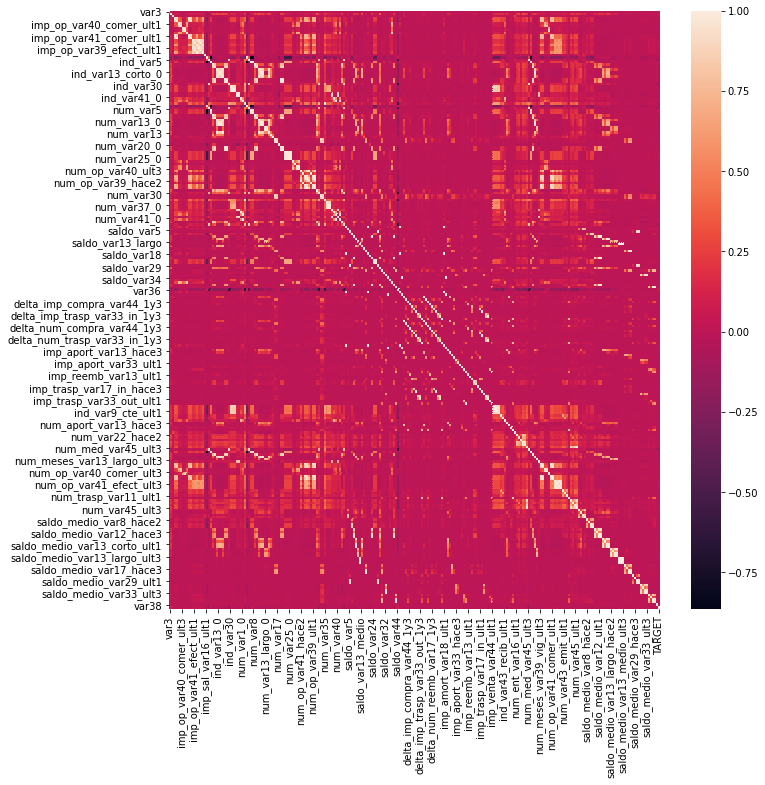

In [172]:
# visualise correlated features
# correlation of all features (for all possible feature combinations)

corrmat = trainX.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

In [173]:
corrmat = trainX.corr()

corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.8] 
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat.head()

,feature1,feature2,corr
0,delta_num_aport_var17_1y3,delta_imp_aport_var17_1y3,1.0
1,delta_imp_aport_var17_1y3,delta_num_aport_var17_1y3,1.0
2,delta_num_aport_var13_1y3,delta_imp_aport_var13_1y3,1.0
3,delta_imp_aport_var13_1y3,delta_num_aport_var13_1y3,1.0
4,saldo_var13_medio,saldo_medio_var13_medio_hace2,1.0


In [174]:
# find groups of correlated features

grouped_feature_ls = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    if feature not in grouped_feature_ls:

        # find all features correlated to a single feature
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]

        # append the block of features to the list
        correlated_groups.append(correlated_block)

print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(trainX.shape[1]))

found 64 correlated groups
out of 247 total features


In [175]:
#Have to remove either of correlated variables
for group in correlated_groups:
    print(group)
    print()


                    feature1                   feature2  corr
0  delta_num_aport_var17_1y3  delta_imp_aport_var17_1y3   1.0

                    feature1                   feature2  corr
2  delta_num_aport_var13_1y3  delta_imp_aport_var13_1y3   1.0

            feature1                       feature2  corr
4  saldo_var13_medio  saldo_medio_var13_medio_hace2   1.0

                       feature1                       feature2  corr
5  saldo_medio_var13_medio_ult1  saldo_medio_var13_medio_hace2   1.0

                    feature1     feature2  corr
8  delta_imp_amort_var34_1y3  saldo_var34   1.0

                        feature1                       feature2  corr
10  saldo_medio_var13_medio_ult3  saldo_medio_var13_medio_hace2   1.0

                feature1                   feature2      corr
12  imp_amort_var18_ult1  delta_imp_amort_var18_1y3  1.000000
16  imp_amort_var18_ult1                saldo_var18  1.000000
69  imp_amort_var18_ult1                 saldo_var1  0.989041

       

In [176]:
#Funcation to drop multicollinear variables
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(trainX, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  129


In [177]:
trainX.drop(labels=corr_features, axis=1, inplace=True)
testX.drop(labels=corr_features, axis=1, inplace=True)

trainX.shape, testX.shape

((50158, 118), (22806, 118))

In [0]:
trainY=trainX['TARGET']
trainX=trainX.drop('TARGET',1)

# **Selecting Columns using mutual Information Gain**

In [184]:
mi = mutual_info_classif(trainX, trainY)
mi

array([8.01645901e-04, 1.27341739e-02, 0.00000000e+00, 1.65609335e-03,
       0.00000000e+00, 0.00000000e+00, 3.94382594e-04, 2.21359886e-03,
       0.00000000e+00, 9.72147333e-03, 1.37637312e-02, 0.00000000e+00,
       2.30740693e-03, 2.84744858e-04, 8.61894669e-03, 0.00000000e+00,
       8.32961964e-04, 1.29839681e-02, 7.65971174e-05, 5.28393962e-04,
       1.34613934e-03, 1.17776660e-03, 6.52890187e-04, 0.00000000e+00,
       0.00000000e+00, 1.29476488e-03, 9.63143299e-04, 0.00000000e+00,
       0.00000000e+00, 5.55076625e-05, 7.84677323e-03, 0.00000000e+00,
       1.20131859e-04, 1.00875639e-02, 9.88845224e-04, 1.63745056e-03,
       8.44657463e-04, 2.38011190e-03, 0.00000000e+00, 1.55019257e-03,
       2.61262875e-04, 7.62920813e-04, 9.00086354e-04, 6.66770631e-04,
       1.28409079e-02, 7.19563830e-04, 0.00000000e+00, 1.93745229e-03,
       1.30256097e-04, 0.00000000e+00, 0.00000000e+00, 9.34178970e-03,
       1.41354667e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

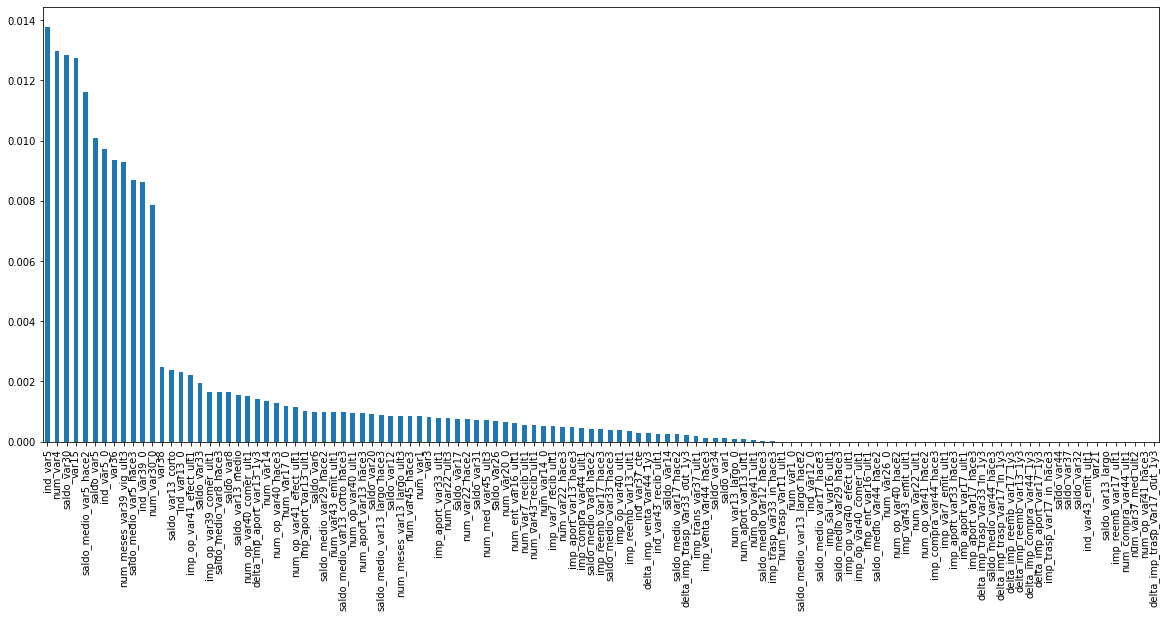

In [188]:
mi = pd.Series(mi)
mi.index = trainX.columns
mi.sort_values(ascending=False)

mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [0]:
sel_ = SelectKBest(mutual_info_classif, k=20).fit(trainX,trainY)
KBestColumns=trainX.columns[sel_.get_support()]

In [0]:
sel_ = SelectPercentile(mutual_info_classif, percentile=20).fit(trainX,trainY)
Top20PercentileColumns=trainX.columns[sel_.get_support()]

In [198]:
selectedColumns=set(list(Top20PercentileColumns)+list(KBestColumns))
selectedColumns

{'delta_imp_trasp_var17_in_1y3',
 'imp_aport_var13_hace3',
 'imp_op_var40_ult1',
 'ind_var12_0',
 'ind_var13_0',
 'ind_var39_0',
 'ind_var5',
 'ind_var5_0',
 'num_compra_var44_ult1',
 'num_med_var45_ult3',
 'num_meses_var39_vig_ult3',
 'num_op_var41_efect_ult1',
 'num_trasp_var11_ult1',
 'num_var22_hace2',
 'num_var22_hace3',
 'num_var30_0',
 'num_var4',
 'saldo_medio_var13_largo_hace2',
 'saldo_medio_var13_largo_hace3',
 'saldo_medio_var33_hace3',
 'saldo_medio_var5_hace2',
 'saldo_medio_var5_hace3',
 'saldo_var1',
 'saldo_var30',
 'saldo_var5',
 'var15',
 'var36',
 'var38'}

#  **Selecting columns using ROC**

In [0]:

roc_values = []
for feature in trainX.columns:
    clf = DecisionTreeClassifier()
    clf.fit(trainX[feature].fillna(0).to_frame(), trainY)
    y_scored = clf.predict_proba(testX[feature].to_frame())
    roc_values.append(roc_auc_score(testY, y_scored[:, 1]))

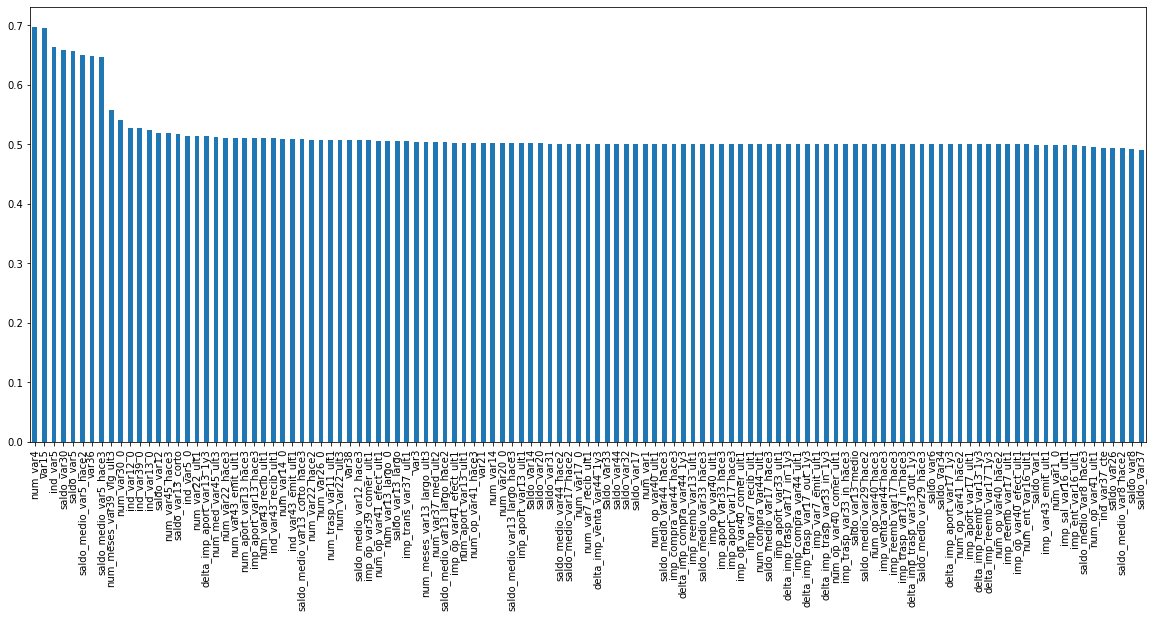

In [206]:
# let's add the variable names and order it for clearer visualisation
roc_values = pd.Series(roc_values)
roc_values.index = trainX.columns
roc_values.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [0]:

selected_columnsUsingDecisionTree=list(roc_values[roc_values > 0.6].reset_index()['index'])

# **Column Selection Using Lasso**

In [241]:

scaler = StandardScaler()
a=trainX
b=trainY
scaler.fit(trainX)
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l2',solver='liblinear'))
sel_.fit(scaler.transform(trainX), trainY)

SelectFromModel(estimator=LogisticRegression(C=1, class_weight=None, dual=False,
                                             fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='auto',
                                             n_jobs=None, penalty='l2',
                                             random_state=None,
                                             solver='liblinear', tol=0.0001,
                                             verbose=0, warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [242]:
selected_feat = trainX.columns[(sel_.get_support())]

print('total features: {}'.format((trainX.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 117
selected features: 36
features with coefficients shrank to zero: 0


# **Feature Selecton using RF**

In [246]:
sel_ = SelectFromModel(RandomForestClassifier(n_estimators=100))
sel_.fit(trainX, trainY)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,

total features: 370
selected features: 16
features with coefficients greater than the mean coefficient: 16


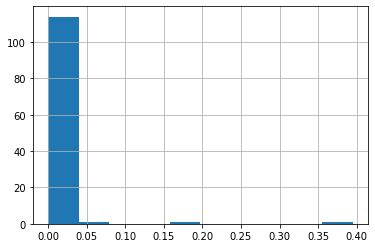

In [250]:
selected_feat_rf = trainX.columns[(sel_.get_support())]

pd.Series(sel_.estimator_.feature_importances_.ravel()).hist()
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat_rf)))
print('features with coefficients greater than the mean coefficient: {}'.format(
    np.sum(sel_.estimator_.feature_importances_ > sel_.estimator_.feature_importances_.mean())))

#**Total Columns Chosen for analysis**

In [271]:
#set(selectedColumns+selected_columnsUsingDecisionTree+selected_feat+selected_feat_rf)
set(list(selected_feat_rf)+list(selectedColumns)+list(selected_columnsUsingDecisionTree)+list(selected_feat))

{'delta_imp_aport_var13_1y3',
 'delta_imp_trasp_var17_in_1y3',
 'imp_aport_var13_hace3',
 'imp_aport_var13_ult1',
 'imp_op_var39_comer_ult1',
 'imp_op_var40_ult1',
 'imp_reemb_var13_ult1',
 'imp_var7_recib_ult1',
 'ind_var12_0',
 'ind_var13_0',
 'ind_var39_0',
 'ind_var5',
 'ind_var5_0',
 'num_aport_var13_hace3',
 'num_aport_var13_ult1',
 'num_compra_var44_ult1',
 'num_med_var45_ult3',
 'num_meses_var13_largo_ult3',
 'num_meses_var39_vig_ult3',
 'num_op_var40_comer_ult1',
 'num_op_var40_hace2',
 'num_op_var40_ult1',
 'num_op_var41_efect_ult1',
 'num_trasp_var11_ult1',
 'num_var20_0',
 'num_var22_hace2',
 'num_var22_hace3',
 'num_var22_ult1',
 'num_var22_ult3',
 'num_var30_0',
 'num_var4',
 'num_var45_hace3',
 'saldo_medio_var12_hace3',
 'saldo_medio_var13_largo_hace2',
 'saldo_medio_var13_largo_hace3',
 'saldo_medio_var17_hace2',
 'saldo_medio_var33_hace3',
 'saldo_medio_var44_hace2',
 'saldo_medio_var44_hace3',
 'saldo_medio_var5_hace2',
 'saldo_medio_var5_hace3',
 'saldo_medio_var8_h